<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *8*: *Clustering***

###**Tenggat Waktu: 17 Desember Tahun 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [103]:
# Isi dengan data diri Anda
NAMA = "Alvaro Austin"
KELAS = "B"
NPM = "2106752180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [104]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alvaro Austin dari kelas B dengan NPM 2106752180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alvaro Austin)


# Deskripsi Dataset

Penjelasan dataset:

1. **mcg**: McGeoch's method for signal sequence recognition.
2. **gvh**: von Heijne's method for signal sequence recognition.
3. **lip**: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
4. **chg**: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
5. **aac**: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. **alm1**: score of the ALOM membrane spanning region prediction program.
7. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

Dataset source: https://archive.ics.uci.edu/dataset/39/ecoli

In [105]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import PCA

# **Preparing Dataset**

In [106]:
# TODO: Open your dataset

df = pd.read_csv("ecoli.csv")

# **Clustering**

### **Pengertian**

**Pengelompokan atau *clustering***, yang merupakan bagian dari unsupervised learning, melibatkan proses mengelompokkan sejumlah titik data ke dalam beberapa kelompok atau klaster sedemikian rupa sehingga objek dalam klaster yang sama memiliki tingkat kemiripan yang tinggi, sementara objek dalam klaster yang berbeda memiliki tingkat kemiripan yang rendah. Berbeda dengan supervised learning, clustering tidak memerlukan label yang terkait dengan setiap objek; sebaliknya, tujuannya adalah untuk menemukan pola dalam data, yang mungkin ada atau mungkin juga tidak (data mungkin tidak memiliki klaster yang jelas). Penting untuk dicatat bahwa algoritma pengelompokan tidak menjelaskan secara eksplisit makna dari setiap klaster, sehingga Anda perlu menginterpretasikannya sendiri, mungkin dengan melakukan visualisasi seperti yang akan dibahas dalam sesi lab kali ini.

### **Motivasi**

Motivasi dari _unsupervised learning_ adalah untuk mengungkap pola, struktur, dan wawasan yang mungkin tersembunyi dalam data tanpa adanya petunjuk atau label yang jelas. Berikut adalah beberapa alasan mengapa _unsupervised learning_ sangat penting dan memiliki motivasi yang kuat:

1. **Penemuan Pola Tersembunyi**: Seringkali, data dunia nyata tidak selalu dilengkapi dengan label yang menjelaskan apa yang ada di dalamnya. Dalam banyak kasus, kita mungkin tidak tahu apa yang harus dicari atau apa yang mungkin ada dalam data. _Unsupervised learning_ memungkinkan kita untuk mengeksplorasi data dan menemukan pola atau struktur yang mungkin tersembunyi, tanpa harus memiliki pengetahuan sebelumnya tentang apa yang harus dicari.

2. **Segmentasi Data**: _Unsupervised learning_ memungkinkan kita untuk mengelompokkan data ke dalam kelompok atau klaster yang memiliki karakteristik atau kemiripan tertentu. Contohnya, dalam analisis pelanggan, kita dapat mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku atau preferensi mereka. Ini dapat membantu perusahaan dalam mengarahkan strategi pemasaran yang lebih efektif.

3. **Ekstraksi Fitur**: Algoritma _unsupervised learning_ dapat digunakan untuk mengekstraksi fitur-fitur penting dari data. Ini bermanfaat dalam mereduksi dimensi data, mengurangi kebisingan, atau mengungkapkan karakteristik yang relevan dalam dataset yang besar. Contohnya, dalam pengolahan citra, kita dapat menggunakan _dimensionality reduction_ untuk mengurangi jumlah fitur yang tidak relevan.

4. **Anomali Detection**: _Unsupervised learning_ juga dapat digunakan untuk mendeteksi anomali dalam data. Ini berguna dalam kasus di mana kita mencoba menemukan data yang tidak biasa atau data yang tidak mengikuti pola mayoritas. Misalnya, dalam keamanan jaringan, kita dapat menggunakan _unsupervised learning_ untuk mendeteksi serangan siber yang tidak biasa.

5. **Preprocessing Data**: _Unsupervised learning_ sering digunakan sebagai tahap awal dalam analisis data sebelum kita beralih ke metode _supervised learning_. Ini termasuk membersihkan data, mengisi data yang hilang, atau mengurangi dimensi data sebelum melatih model prediksi.

6. **Penelitian Ilmiah dan Penemuan Baru**: Dalam beberapa kasus, _unsupervised learning_ digunakan dalam penelitian ilmiah untuk menemukan wawasan baru dalam data. Contohnya, dalam bidang ilmu genetika, analisis _unsupervised learning_ dapat membantu mengungkap pola baru dalam ekspresi gen atau perbedaan dalam populasi.

Dalam rangkaian kasus di atas, _unsupervised learning_ memberikan cara untuk mengungkap dan memahami data yang mungkin sulit dipahami atau dianalisis dengan metode lain. Ini membuatnya menjadi alat yang kuat dalam berbagai bidang, termasuk ilmu data, kecerdasan buatan, pengolahan bahasa alami, penglihatan komputer, dan banyak lagi.

### **Jenis-jenis Algoritma**

Ada banyak algoritma _clustering_ yang digunakan untuk mengelompokkan data dalam berbagai konteks. Berikut beberapa algoritma _clustering_ yang umum digunakan:
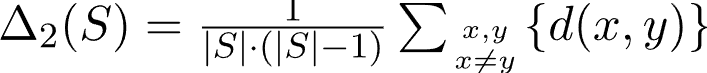
1. **K-Means**: Algoritma _K-Means_ adalah salah satu algoritma _clustering_ paling populer. Ini membagi data menjadi _K_ kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.

2. **Hierarchical Clustering**: Algoritma _clustering_ hierarki membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai _dendrogram_, yang memungkinkan analisis tingkat hierarki.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritma _DBSCAN_ mengelompokkan data berdasarkan kerapatan. Ini mengidentifikasi kluster sebagai daerah di mana terdapat titik data yang cukup padat, sementara titik yang berada jauh dari kluster dianggap sebagai _noise_.

4. **Agglomerative Clustering**: Ini adalah pendekatan hierarkis untuk pengelompokan di mana setiap titik data dianggap sebagai kluster tunggal dan kemudian secara berurutan menggabungkan kluster yang paling dekat satu sama lain hingga satu kluster besar terbentuk.

Pilihan algoritma _clustering_ bergantung pada karakteristik data dan tujuan analisis. Setiap algoritma memiliki kelebihan dan kelemahan yang harus dipertimbangkan sesuai dengan kebutuhan Anda.

Pada lab kali ini kita hanya akan membahas atau menggunakan beberapa algoritma yang dijelaskan pada slide yang tersedia yakni **K-Means** dan **Hierarchical**

# **Latihan Soal Praktis** [70]

**Prapemrosesan data:**
Sebelum menjalankan algoritma clustering, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan pre-processing pada data agar siap digunakan untuk clustering menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

- Handle missing value: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan missing value tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
- Handle outliers: Algoritma K-Means sangat sensitif terhadap outliers (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle outliers dengan heuristics tertentu (misalnya dengan metode capping).
- Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan StandardScaler).
- Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan LabelEncoder), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti K-Prototypes, tetapi hal tersebut di luar scope lab ini).

In [107]:
# Some useful functions

def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])


from typing import Literal

# Outlier related

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(dataframe, col_name):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_iqr(dataframe, cols, target_value, columns_to_label_encode = [], columns_to_one_hot_encode = [], replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != target_value and (col_name not in columns_to_one_hot_encode) and (col_name not in columns_to_label_encode):
            outliers_ = check_outliers_iqr(dataframe,col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe, col_name)
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')


def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

def check_outliers_std(dataframe, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_std(dataframe, cols, target_value, columns_to_label_encode = [], columns_to_one_hot_encode = [], replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != target_value and col_name not in columns_to_one_hot_encode and col_name not in columns_to_label_encode:
            outliers_ = check_outliers_std(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(dataframe, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')

def remove_outlier(df, type: Literal['iqr', 'std', "nah"], target_value, columns_to_label_encode, columns_to_one_hot_encode):
  print(dict(check_outlier(df).sum()))
  print("Boxplot Old")
  df.boxplot(vert=False, figsize=(20,20))
  if(type == "iqr"):
    replace_with_thresholds_iqr(df, df.columns, target_value, columns_to_label_encode, columns_to_one_hot_encode, replace=True)
  elif(type == "std"):
    replace_with_thresholds_std(df, df.columns, target_value, columns_to_label_encode, columns_to_one_hot_encode, replace = True)
  else:
    pass
  print(dict(check_outlier(df).sum()))

def standaridize_data(df):
  scaler = StandardScaler()
  df[df.columns] = scaler.fit_transform(df[df.columns])

  print("\n\n Standaridized DF: \n" + "="*40)
  print(df)

In [108]:
# Do the inspection on the dataset

df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1


Tidak ditemukan missing value pada dataset
Outlier pada tiap atribut:
mcg       0
gvh      13
lip      10
chg       1
aac       9
alm1      0
alm2      0
class     0
dtype: int64
{'mcg': 0, 'gvh': 13, 'lip': 10, 'chg': 1, 'aac': 9, 'alm1': 0, 'alm2': 0, 'class': 0}
Boxplot Old
Outlier pada tiap atribut:
mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
class    0
dtype: int64
{'mcg': 0, 'gvh': 0, 'lip': 0, 'chg': 0, 'aac': 0, 'alm1': 0, 'alm2': 0, 'class': 0}


 Standaridized DF: 
          mcg       gvh           lip  chg       aac      alm1      alm2  \
0   -0.051761 -1.447125 -1.110223e-16  0.0  0.512230 -1.207717 -0.716084   
1   -2.212876 -0.683534 -1.110223e-16  0.0  0.340336 -0.697111 -0.285665   
2    0.308424 -0.683534 -1.110223e-16  0.0 -0.089401 -0.604273 -0.190016   
3    0.462790 -0.058777 -1.110223e-16  0.0  0.168441 -0.232923 -0.668259   
4   -1.389594 -1.238872 -1.110223e-16  0.0  0.426283 -1.161299 -0.716084   
..        ...       ...        

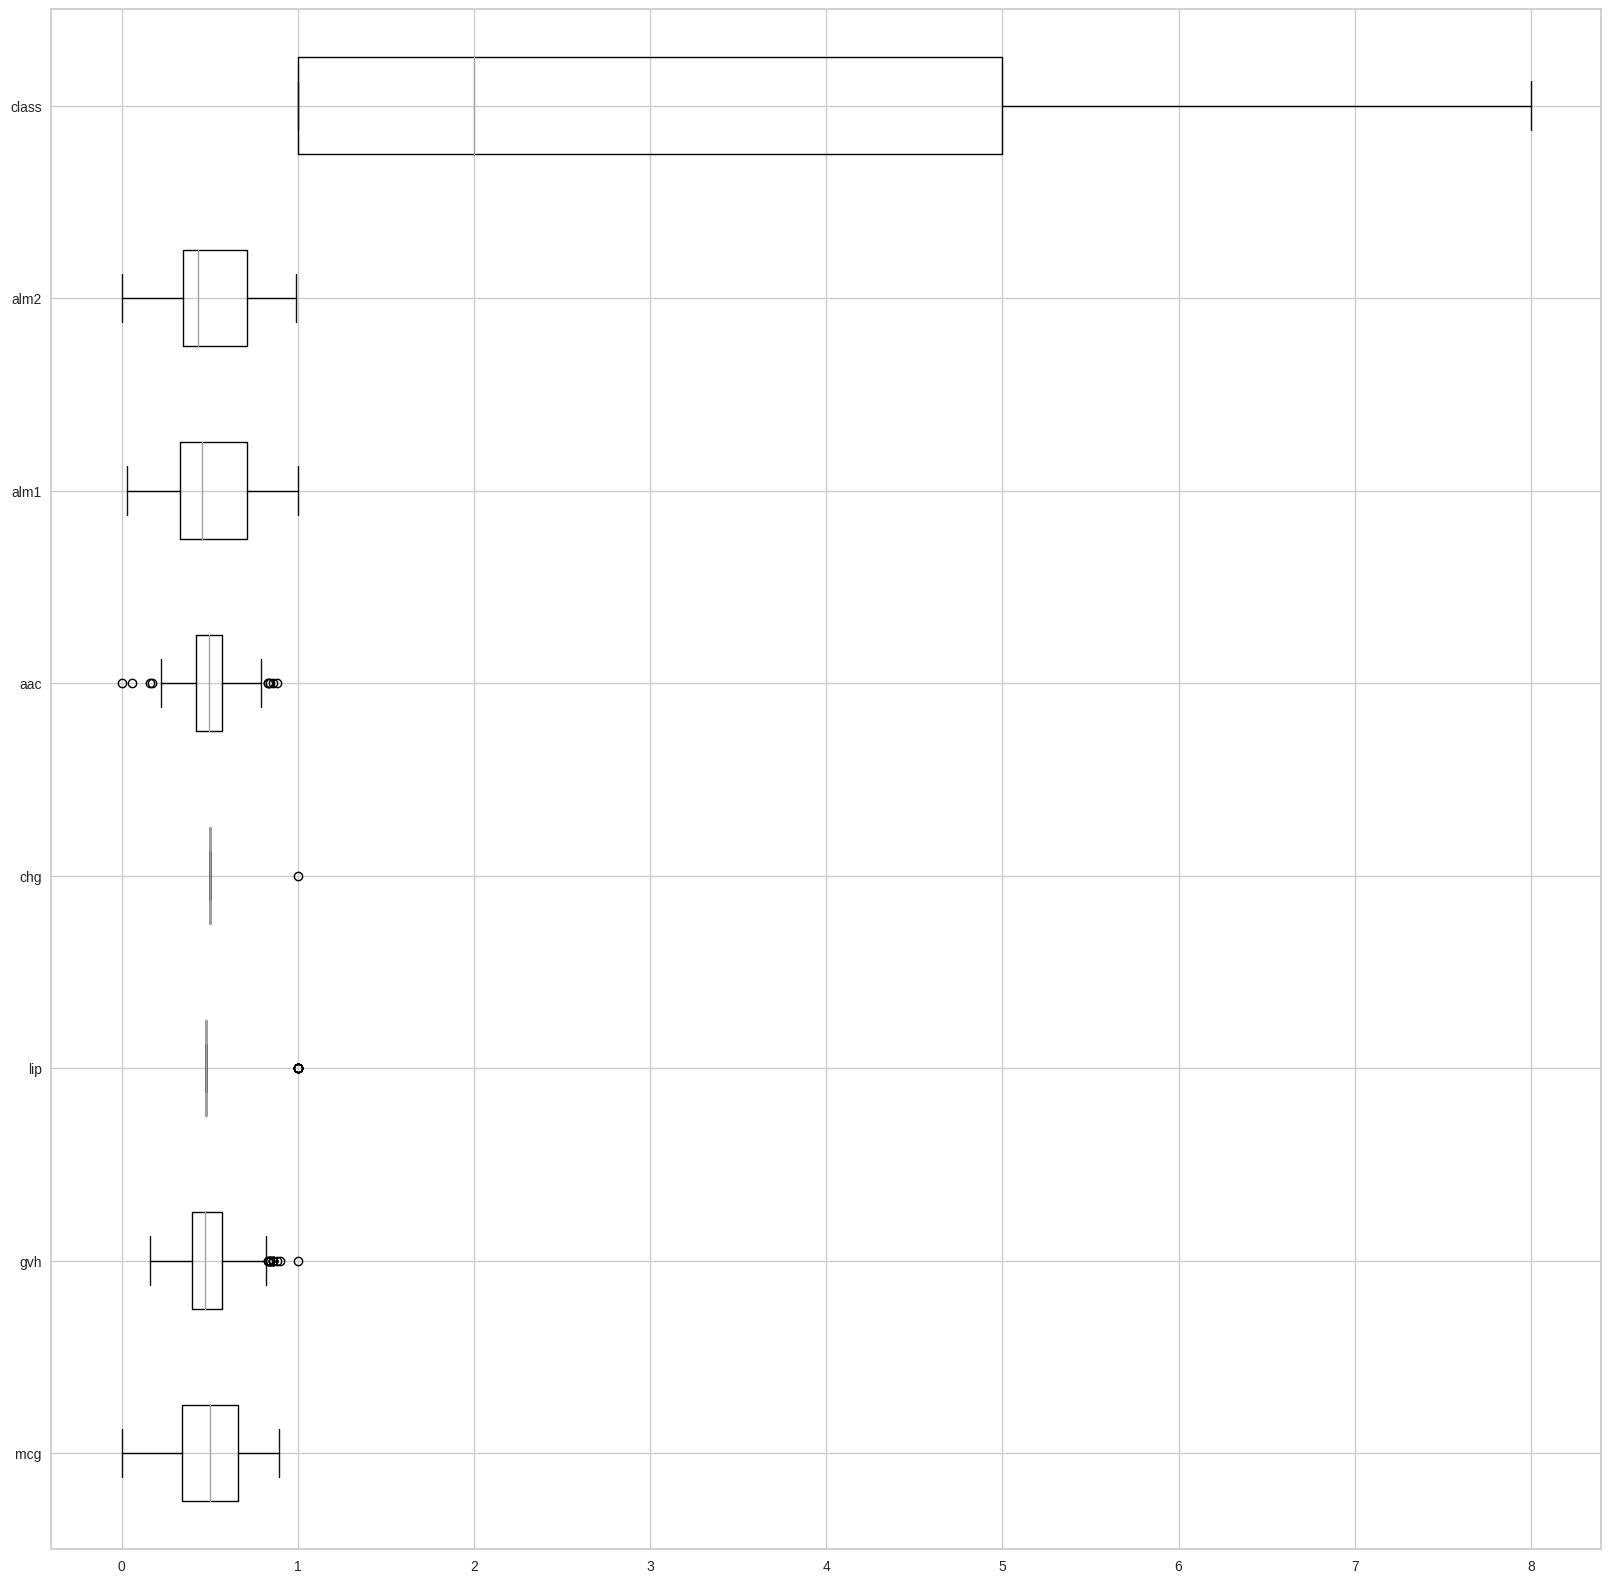

In [109]:
# Do the preprocess

# Dapat dilihat dari output
def preprocess(df, outlier_type, target_value, columns_to_label_encode, columns_to_one_hot_encode):
  check_null(df) # Remove missing value

  remove_outlier(df, outlier_type, target_value, columns_to_label_encode, columns_to_one_hot_encode)

  standaridize_data(df)
preprocess(df, "iqr", "", [], [])

In [110]:
# TODO: After preprocess the data, select some columns for clustering and assign it as X
X = df[['gvh', 'alm1', 'alm2']]

X

,gvh,alm1,alm2
0,-1.447125,-1.207717,-0.716084
1,-0.683534,-0.697111,-0.285665
2,-0.683534,-0.604273,-0.190016
3,-0.058777,-0.232923,-0.668259
4,-1.238872,-1.161299,-0.716084
...,...,...,...
331,0.427144,0.834709,-0.955205
332,0.496561,-0.697111,-0.859557
333,0.704813,-0.511436,-0.572611
334,0.774231,-0.372179,-0.620435


## K-Means Clustering [35]

For n_clusters = 2 The average silhouette_coefficient is : 0.4807292875892103
For n_clusters = 3 The average silhouette_coefficient is : 0.5013717329070827
For n_clusters = 4 The average silhouette_coefficient is : 0.4386380276530994
For n_clusters = 5 The average silhouette_coefficient is : 0.35794863712904973
For n_clusters = 6 The average silhouette_coefficient is : 0.30575707914720673
For n_clusters = 7 The average silhouette_coefficient is : 0.3205645721439875
For n_clusters = 8 The average silhouette_coefficient is : 0.33432097672815453


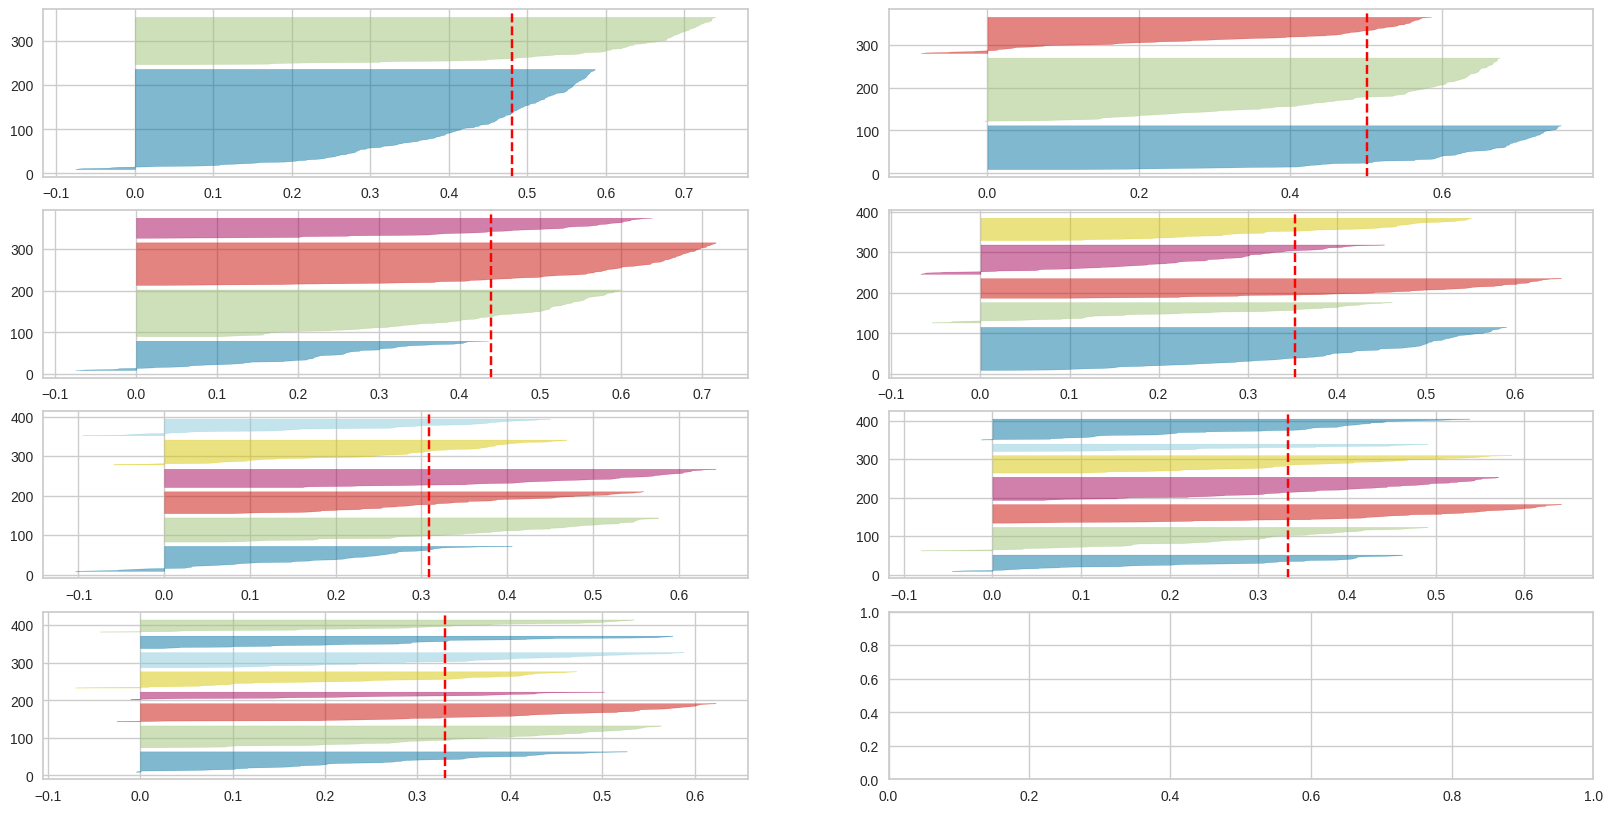

In [111]:
# TODO: Anda dapat menambahkan nilai kemungkinan dari jumlah cluster yang akan dibuat untuk melihat kemungkinan pembentukkan cluster yang lebih baik.
num_of_cluster = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [112]:
# TODO: Anda dapat menyesuaikan nilai dari n_clusters
kmeans = KMeans(n_clusters=3)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('gvh', 'alm1'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gvh,alm1,Clusters
0,-1.447125,-1.207717,1
1,-0.683534,-0.697111,1
2,-0.683534,-0.604273,1
3,-0.058777,-0.232923,1
4,-1.238872,-1.161299,1
...,...,...,...
331,0.427144,0.834709,0
332,0.496561,-0.697111,0
333,0.704813,-0.511436,0
334,0.774231,-0.372179,0


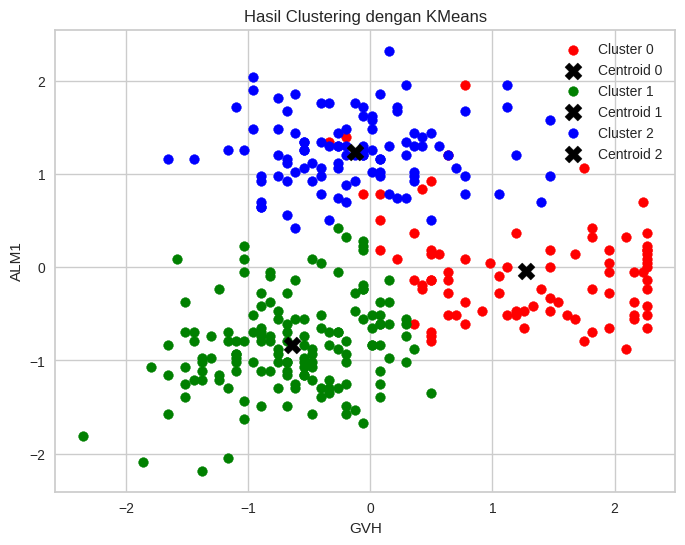

In [113]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.

# Warna untuk setiap cluster
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Pada plot ini ada data-data setiap cluster dan centroidnya (berwanra mark X hitam)
plt.figure(figsize=(8, 6))
for cluster, color in colors.items():
    clustered_data = data_with_clusters[data_with_clusters['Clusters'] == cluster]
    plt.scatter(clustered_data['gvh'], clustered_data['alm1'], color=color, label=f'Cluster {cluster}')

    # Centroidnya.
    centroid = clustered_data[['gvh', 'alm1']].mean()
    plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=150, label=f'Centroid {cluster}')
plt.xlabel('GVH')
plt.ylabel('ALM1')
plt.title('Hasil Clustering dengan KMeans')
plt.legend()
plt.show()

## Hierarchical Clustering [35]

In [114]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [115]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(X)
clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([304, 258, 302, 188, 328, 266, 229, 330, 262, 190, 245, 301, 174,
       309, 237, 225, 246, 169, 325, 227, 231, 303, 224, 327, 170, 333,
       313, 306, 321, 278, 308, 260, 334, 310, 244, 179, 204, 280, 322,
       199, 300, 285, 296, 318, 284, 277, 234, 282, 175, 154, 176,  84,
       197, 191, 238, 243, 274, 239, 251, 203, 317, 232, 168, 215, 261,
       257, 292, 271, 252, 213, 269, 235, 255, 295, 315, 259, 115, 250,
       210, 208, 205, 320, 326, 272, 264, 184, 150, 207, 316, 222, 335,
       223, 217, 286, 236, 253, 331, 158, 270, 279, 138, 103, 180, 111,
       281, 118, 267, 157, 201, 129, 293, 209, 195, 329, 206, 268, 241,
       196, 198, 247, 311,  78, 164, 147, 294, 221, 110, 102, 219, 194,
       249, 216, 133, 173, 151, 134, 240, 177, 146,  97, 287, 121, 130,
       256, 319, 288, 140, 323, 159, 233, 127, 283, 143, 297, 299, 242,
       117, 298, 265, 149, 228, 332, 142, 314, 230, 212, 289, 307, 312,
       165, 122, 153,  64, 305, 104, 163,  66,  87, 162, 187,  6

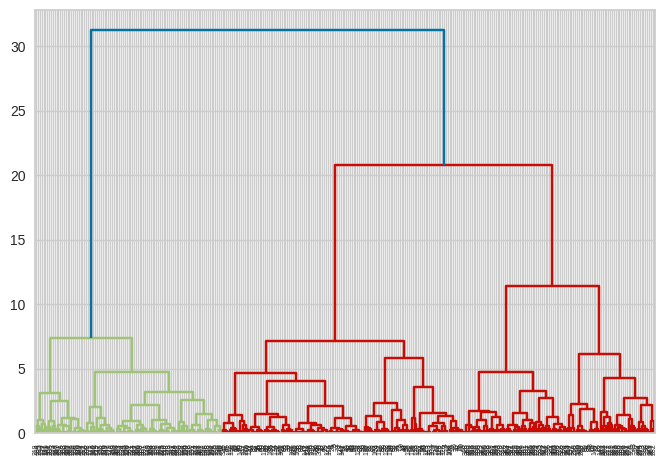

In [116]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.

plot_dendrogram(clustering)

In [117]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
data_with_clusters['Agg_clusters'] = clustering.fit_predict(X)
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,gvh,alm1,Clusters,Agg_clusters
0,-1.447125,-1.207717,1,2
1,-0.683534,-0.697111,1,2
2,-0.683534,-0.604273,1,2
3,-0.058777,-0.232923,1,0
4,-1.238872,-1.161299,1,2
...,...,...,...,...
331,0.427144,0.834709,0,0
332,0.496561,-0.697111,0,0
333,0.704813,-0.511436,0,0
334,0.774231,-0.372179,0,0


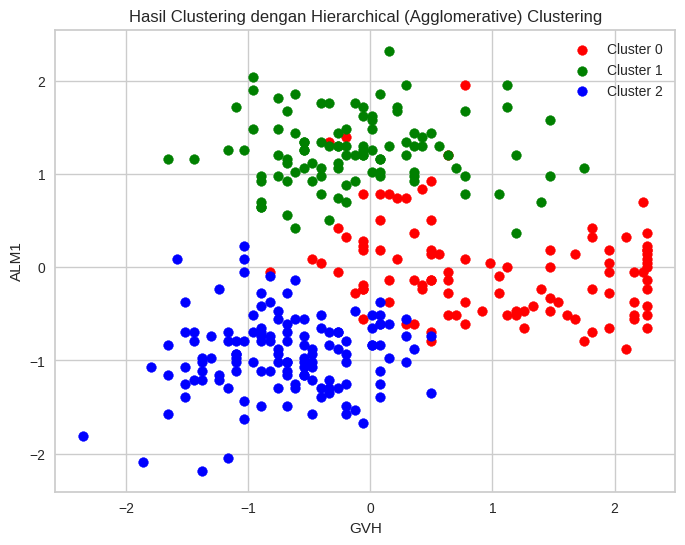

In [118]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.

# Warna untuk setiap cluster
colors = {0: 'red', 1: 'green', 2: 'blue'}

# Pada plot ini ada data-data setiap cluster dan centroidnya (berwanra mark X hitam)
plt.figure(figsize=(8, 6))
for cluster, color in colors.items():
    clustered_data = data_with_clusters[data_with_clusters['Agg_clusters'] == cluster]
    plt.scatter(clustered_data['gvh'], clustered_data['alm1'], color=color, label=f'Cluster {cluster}')

plt.xlabel('GVH')
plt.ylabel('ALM1')
plt.title('Hasil Clustering dengan Hierarchical (Agglomerative) Clustering')
plt.legend()
plt.show()

# **Latihan Soal Teoritis** [30]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

> Berdasarkan hasil clustering menggunakan `KMeans` yang ditampilkan dalam gambar, terdapat tiga cluster yang terbentuk, yaitu Cluster 0, Cluster 1, dan Cluster 2. Berikut adalah interpretasinya:
<br><br>Cluster 0 (Merah): Cluster ini terletak di sudut kiri bawah plot. Data points dalam cluster ini memiliki nilai GVH dan ALM yang relatif rendah dibandingkan dengan cluster lainnya.
<br><br>Cluster 1 (Biru): Cluster ini menempati bagian tengah atas plot. Data points dalam cluster ini memiliki nilai ALM yang lebih tinggi dibandingkan dengan cluster lainnya, sementara nilai GVH-nya berada di kisaran tengah.
<br><br>Cluster 2 (Hijau): Cluster ini terletak di sisi kanan plot. Data points dalam cluster ini memiliki nilai GVH yang lebih tinggi dibandingkan dengan cluster lainnya, sementara nilai ALM-nya berada di kisaran tengah.
<br><br>Centroid dari setiap cluster ditandai dengan simbol ‘X’ dalam warna yang sesuai dengan cluster tersebut. Centroid mewakili pusat dari setiap cluster.


2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

> Berikut adalah penjelasan singkat tentang empat algoritma clustering lainnya selain (K-Means, Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), Agglomerative Clustering):
>> Spectral Clustering: Algoritma ini bekerja dengan memodelkan data sebagai grafik dan kemudian mencoba menemukan pemisahan alami dalam grafik untuk mengidentifikasi cluster. Ini dilakukan dengan mengubah data menjadi ruang dimensi yang lebih rendah yang dapat memisahkan cluster dengan mudah.<br><br>
>> Mean-Shift Clustering: Algoritma ini bekerja dengan memperbarui kandidat untuk centroid menjadi rata-rata dari data points dalam jangkauan. Proses ini diulangi sampai semua centroid tidak bergerak secara signifikan. Algoritma ini tidak memerlukan jumlah cluster yang ditentukan sebelumnya.<br><br>
>> Affinity Propagation: Algoritma ini menggunakan pendekatan “message passing” di mana setiap data point mengirim pesan ke data point lainnya tentang kelayakannya sebagai contoh. Proses ini diulangi sampai set cluster stabil terbentuk.<br><br>
>> BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies): Algoritma ini sangat efisien untuk data set yang sangat besar. BIRCH secara bertahap membangun struktur pohon yang mempertahankan informasi yang cukup untuk memungkinkan clustering, tetapi tidak perlu menyimpan seluruh data set di memori.

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

>
>>Silhouette Coefficient: Metrik ini mengukur sejauh mana objek pada satu cluster mirip dengan objek dalam cluster yang sama dibandingkan dengan objek di cluster lain. Nilai koefisien ini berkisar antara -1 hingga 1. Nilai yang mendekati 1 menunjukkan bahwa sampel tersebut jauh dari cluster tetangga. Nilai yang mendekati -1 menunjukkan bahwa sampel tersebut dekat dengan cluster tetangga. Nilai mendekati 0 menunjukkan bahwa sampel tersebut berada di atau sangat dekat dengan batas keputusan antara dua cluster.
<br><br>
>> Sum of square (SSQ): Metrik ini adalah representasi dari homogenitas dalam cluster. Jika nilai SSQ lebih kecil, maka data dalam satu cluster akan lebih homogen dan tentunya memberikan hasil cluster yang baik. SSQ mengukur total jarak kuadrat antara setiap anggota cluster dan pusat clusternya. Tujuannya adalah untuk meminimalkan jarak ini, karena cluster yang lebih homogen (dengan kata lain, anggota cluster yang lebih dekat satu sama lain) dianggap lebih baik.
<br><br>
>> Davies-Bouldin Index: Metrik ini mengukur rata-rata ‘kesamaan’ antara cluster, di mana kesamaan adalah rasio jarak dalam cluster terhadap jarak antar cluster. Nilai indeks Davies-Bouldin yang lebih rendah menunjukkan model yang lebih baik.

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu cluster dianggap baik berdasarkan kedua metrik di atas? [6]

>
>>Intra-cluster similarity: Metrik ini mengukur sejauh mana objek dalam cluster yang sama mirip satu sama lain. Ada 3 cara untuk menghitungnya:
1. *Average Diameter Distance*: Menghitung jarak antara setiap pasangan objek dalam cluster yang sama dan kemudian mengambil rata-rata dari semua jarak tersebut.
<br>
<img src = "https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-aaa1dedcf7d4570911c7f0d83f8cebb7_l3.svg" alt = "average distance"/>
<br>
2. *Complete Diameter Distance*: Menghitung jarak antara setiap pasangan objek dalam cluster yang sama dan kemudian mengambil jarak terjauh yang ditemukan.
<br>
<img src = "https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-2055a3c844343450ac227d93f746bc1d_l3.svg" alt = "complete distance"/>
<br>
3. *Centroid Diameter Distance*: Menghitung jarak rata-rata dua kali lipat antara semua objek dan pusat cluster tersebut.
<br>
<img src = "https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-09f23b1b680bbb34edec1efa9b719f96_l3.svg" alt = "complete distance"/>

>> Inter-cluster dissimilarity: Metrik ini mengukur sejauh mana objek dalam cluster yang berbeda tidak mirip satu sama lain. Ada 5 cara untuk menghitungnya:
1. *Average Linkage Distance*: Menghitung jarak antara setiap pasangan objek pada 2 cluster yang berbeda dan kemudian mengambil rata-rata dari semua jarak tersebut.
<br>
<img src = "https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-97d98a11650297d6a26156a8ff2b0f1f_l3.svg" alt = "average distance"/>
<br>
2. *Complete Linkage Distance*: Menghitung jarak antara 2 pasangan objek yang terjauh pada 2 cluster yang berbeda.
<br>
<img src = "https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-396b73057f4546ef38aad33c8fe7c450_l3.svg" alt = "complete distance"/>
<br>
3. *Centroid Linkage Distance*: Menghitung jarak antara pusat 2 cluster berbeda.
<br>
<img src = "https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-8593d1ffa7e786d81f3c8283419a7fd4_l3.svg" alt = "complete distance"/>
4. *Single Linkage Distance*: Menghitung jarak antara 2 pasangan objek yang terdekat pada 2 cluster yang berbeda.
<br>
<img src = "https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-bde58b186b265a7a880d1e641bbbf5d6_l3.svg"/>
<br>
5. *Average Centroid Linkage Distance*: Menghitung jarak antara pusat suatu cluster dengan semua objek yang termasuk dalam cluster yang berbeda.
<br>
<img src = "https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-e49a1d0757c437432d4c984280158d40_l3.svg"/>
<br>

> Referensi: Geeks for Geeks (https://www.geeksforgeeks.org/ml-intercluster-and-intracluster-distance/)

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

> Menurut saya, algoritma K-Means mungkin tidak efektif untuk data pengelompokkan yang tidak bersifat globular karena beberapa alasan berikut:
1. Pendekatan Sentroid: K-Means menggunakan pendekatan sentroid, di mana setiap cluster diwakili oleh titik pusat atau rata-rata dari poin dalam cluster tersebut. Ini berfungsi dengan baik untuk data globular di mana semua poin dalam cluster cenderung berada pada jarak yang kira-kira sama dari sentroid. Namun, untuk data yang tidak globular atau memiliki bentuk yang kompleks, sentroid mungkin tidak mewakili dengan baik distribusi poin dalam cluster.
2. Jarak Euklidian: K-Means biasanya menggunakan jarak Euklidian untuk mengukur kedekatan antara poin data dan sentroid. Jarak Euklidian cenderung bekerja dengan baik ketika cluster memiliki bentuk globular dan berukuran sama. Namun, untuk data yang tidak globular atau cluster yang memiliki bentuk atau ukuran yang berbeda, pengukuran ini mungkin tidak efektif.
3. Keterbatasan dalam bentuk cluster: K-Means mengasumsikan bahwa cluster-cluster memiliki bentuk yang bulat (globular) dan ukuran yang seragam. Ketika sebenarnya data memiliki cluster dengan bentuk yang tidak teratur, seperti cluster berbentuk elongated atau bentuk yang kompleks, K-Means dapat menghasilkan cluster yang tidak sesuai dengan pola sebenarnya.
4. Sensitivitas terhadap pencilan (outliers): Pencilan dalam data dapat memengaruhi perhitungan centroid secara signifikan. K-Means rentan terhadap gangguan ini dan dapat menghasilkan cluster yang tidak representatif jika terdapat pencilan.
5. Keterbatasan jumlah cluster: K-Means membutuhkan jumlah cluster yang telah ditentukan sebelumnya (hyperparameter k). Pada data yang tidak bersifat globular, menentukan jumlah cluster yang tepat bisa menjadi tantangan.


> Untuk menghitung menggunakan algoritma K-Means saya akan menggunakan contoh pada slide mata kuliah untuk melakukan visualisasi cara pengerjaannya.
1. Memilih K centroid (untuk cluster) yang akan digunakan.
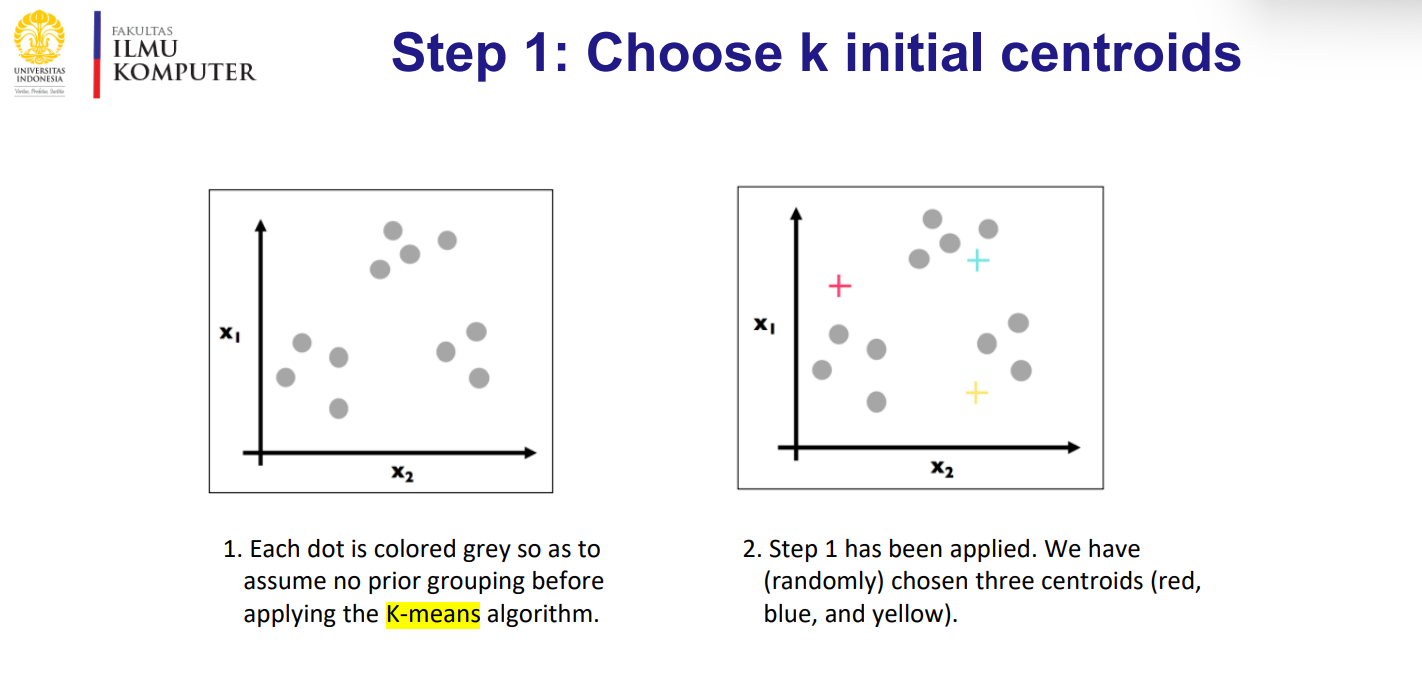
Dapat dilihat bahwa kita menginisasi 3 K sebagai banyaknya cluster kita. Nanti akan diperlihatkan bahwa akan dibentuk lagi clusternya.
2. Untuk setiap data, petakan data tersebut pada centroid terdekat.
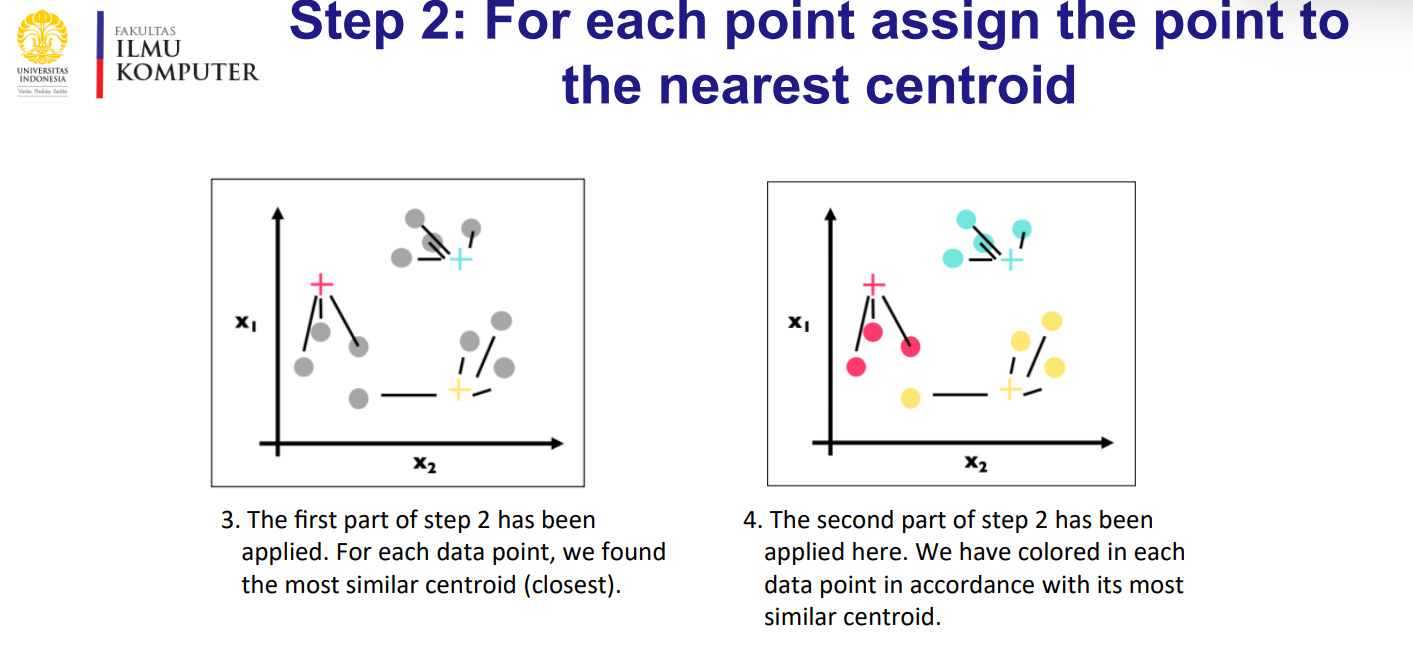
Dapat dilihat bahwa untuk semua data, sudah ditemukan centroid yang paling dekat dengan data tersebut.
3. Hitung kembali Posisi Centroid dengan menggunakan rata-rata setiap poin.
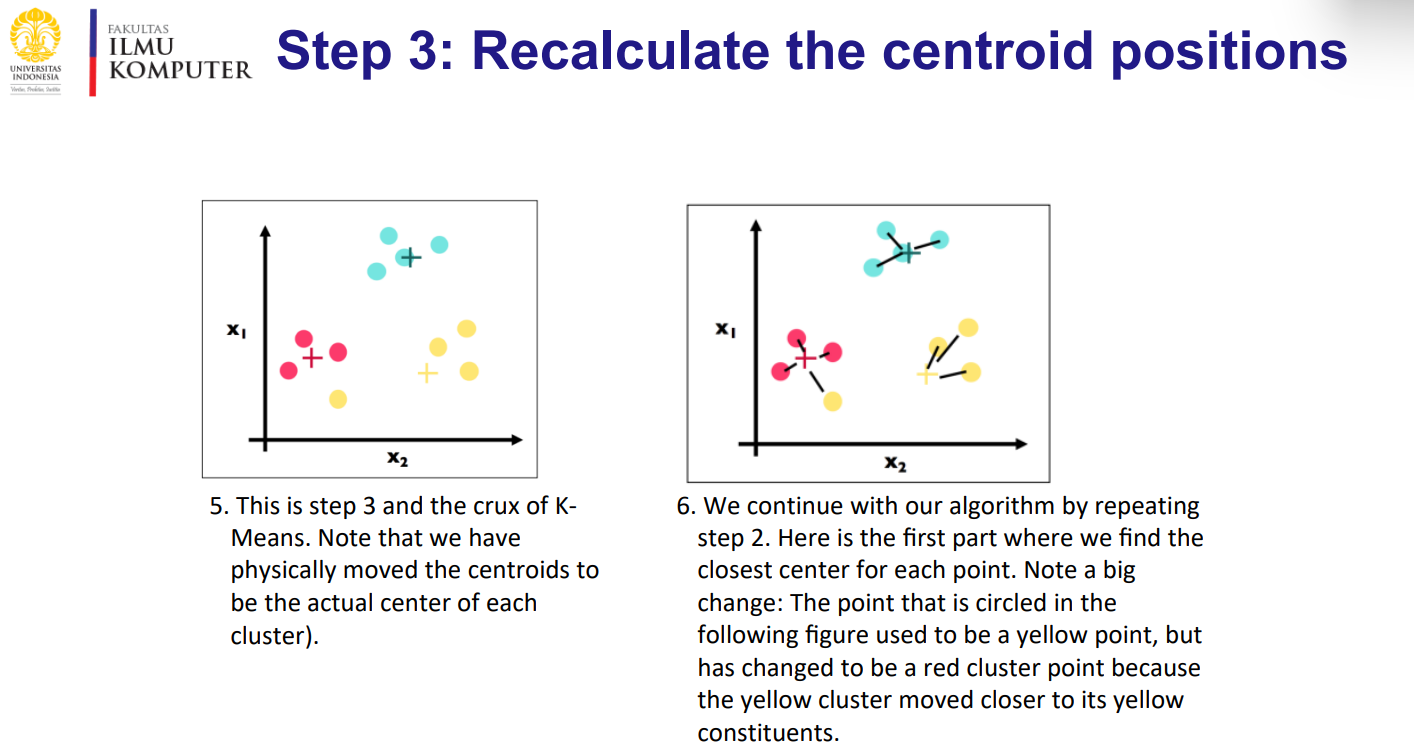
4. Ulangi langkah 2 dan 3 sampai kriteria untuk K-means dipenuhi, kritera tersebut adalah:
- Tidak ada pemetaan data pada cluster yang berbeda dari sebelumnya.
- Tidak ada perbedaan tempat centroid kita (yang didapatkan melalui rata-rata data-data pada centroid tersebut.
- Penurunan SSE yang minimum.
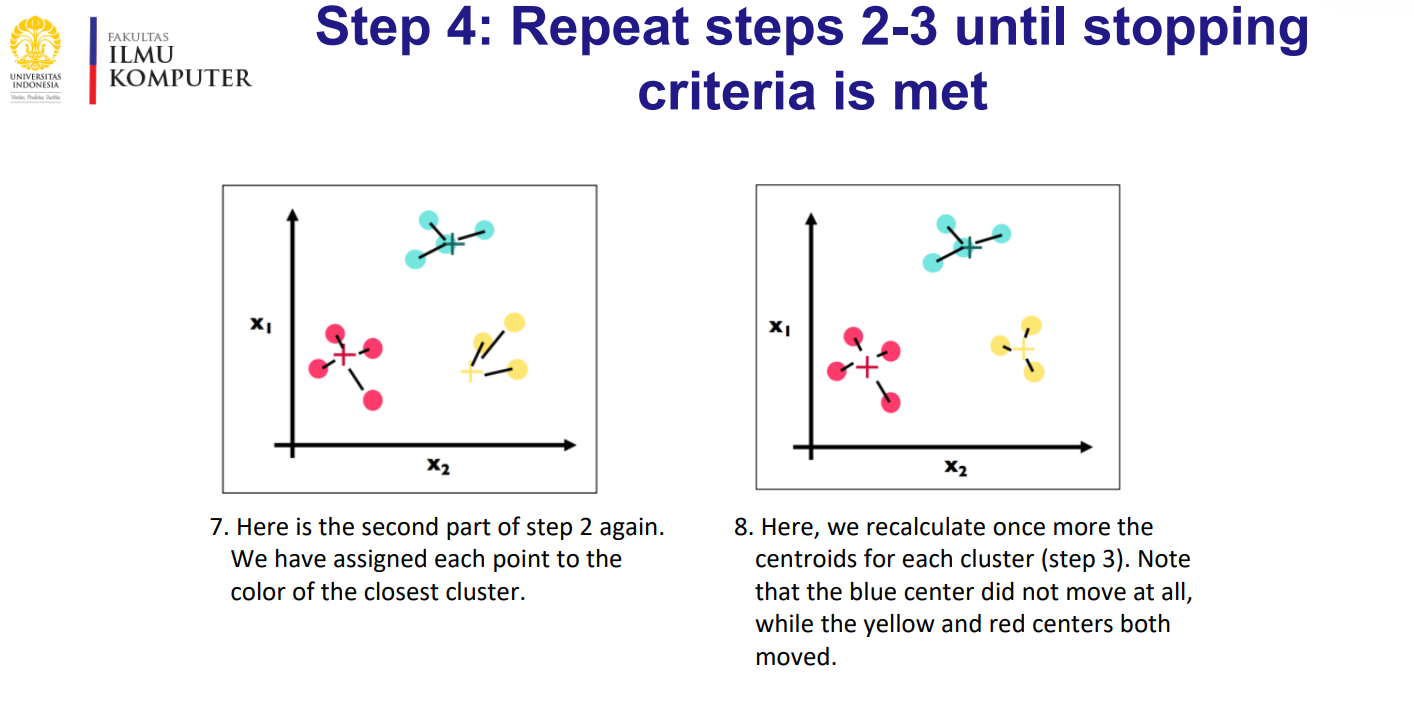
Dapat dilihat bahwa terdapat pemetaan data ke cluster yang berbeda (dari kuning jadi merah karena terdekat).
<br><br>
Berikut adalah perhitungan manual menggunakan data poin (contoh dari slide, menggunakan *manhattan distance*):
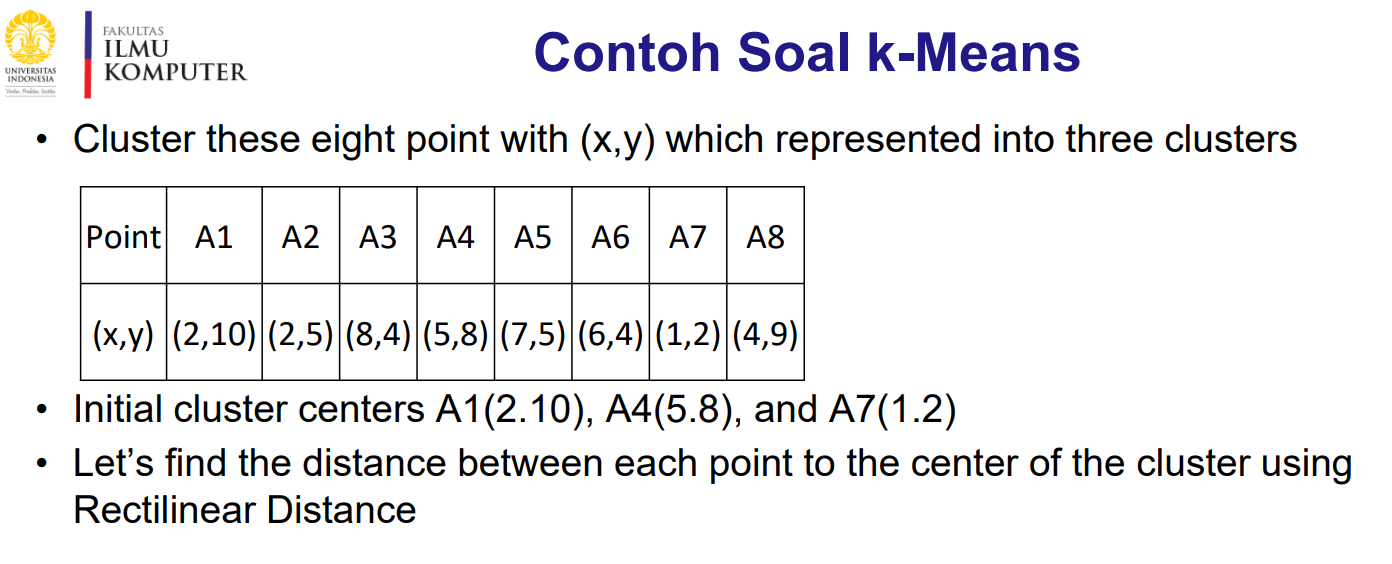
1. Iterasi 1
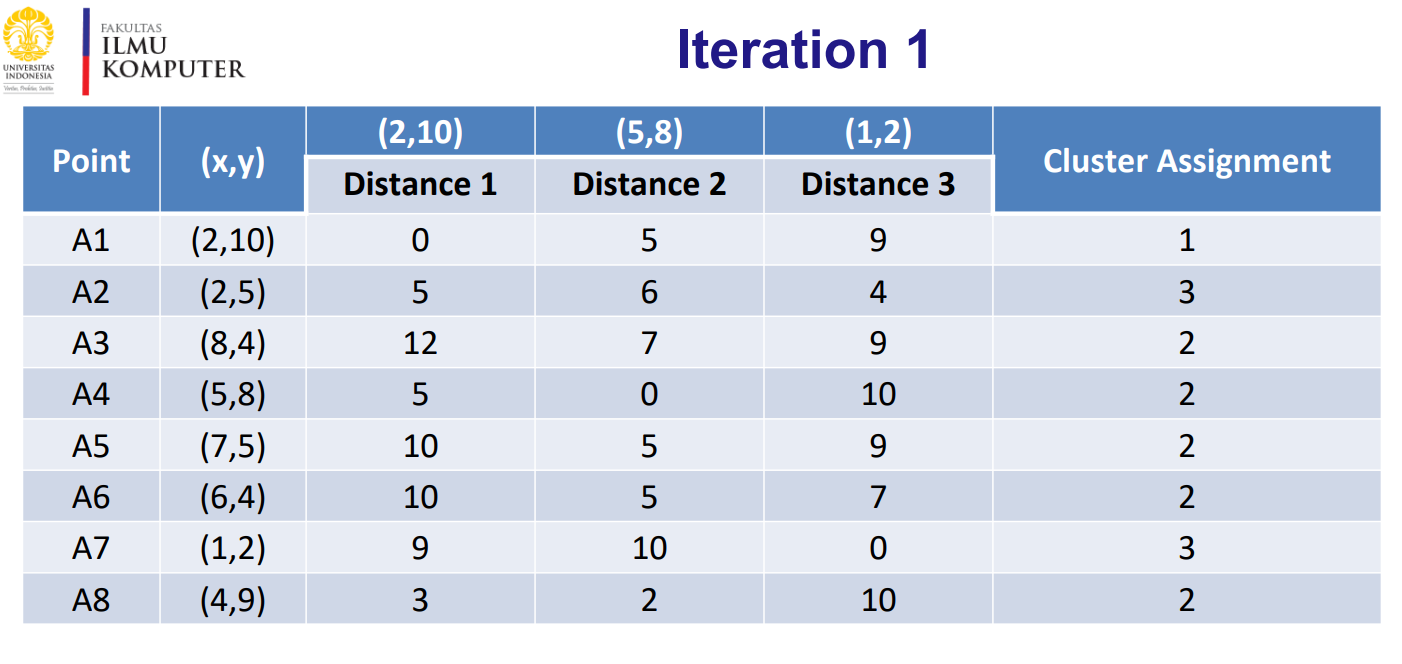
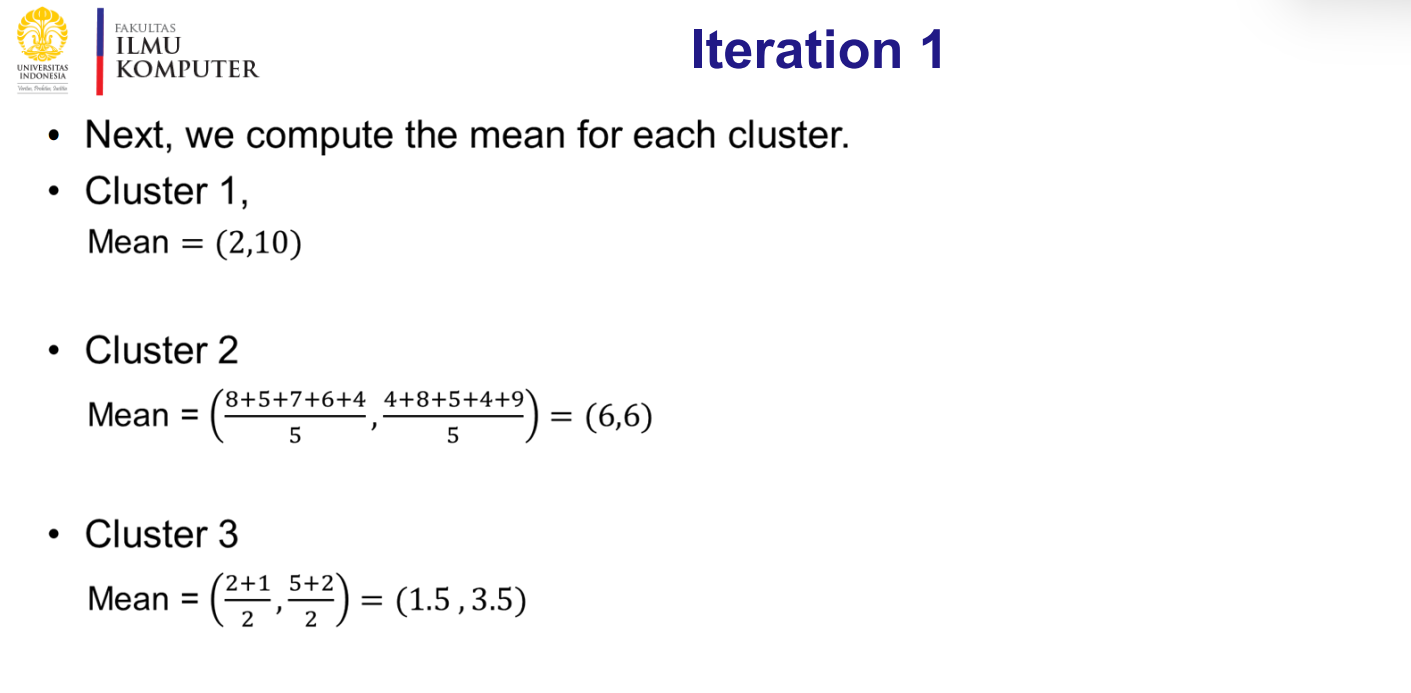
2. Iterasi 2
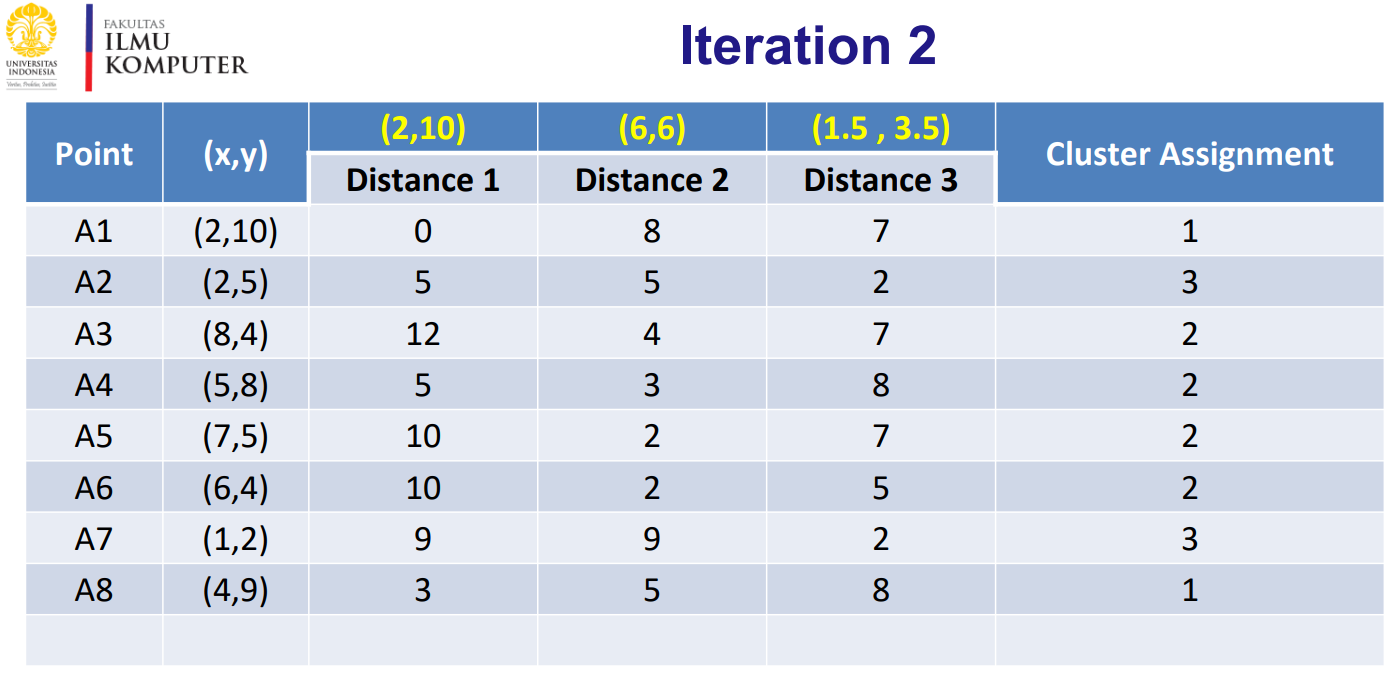
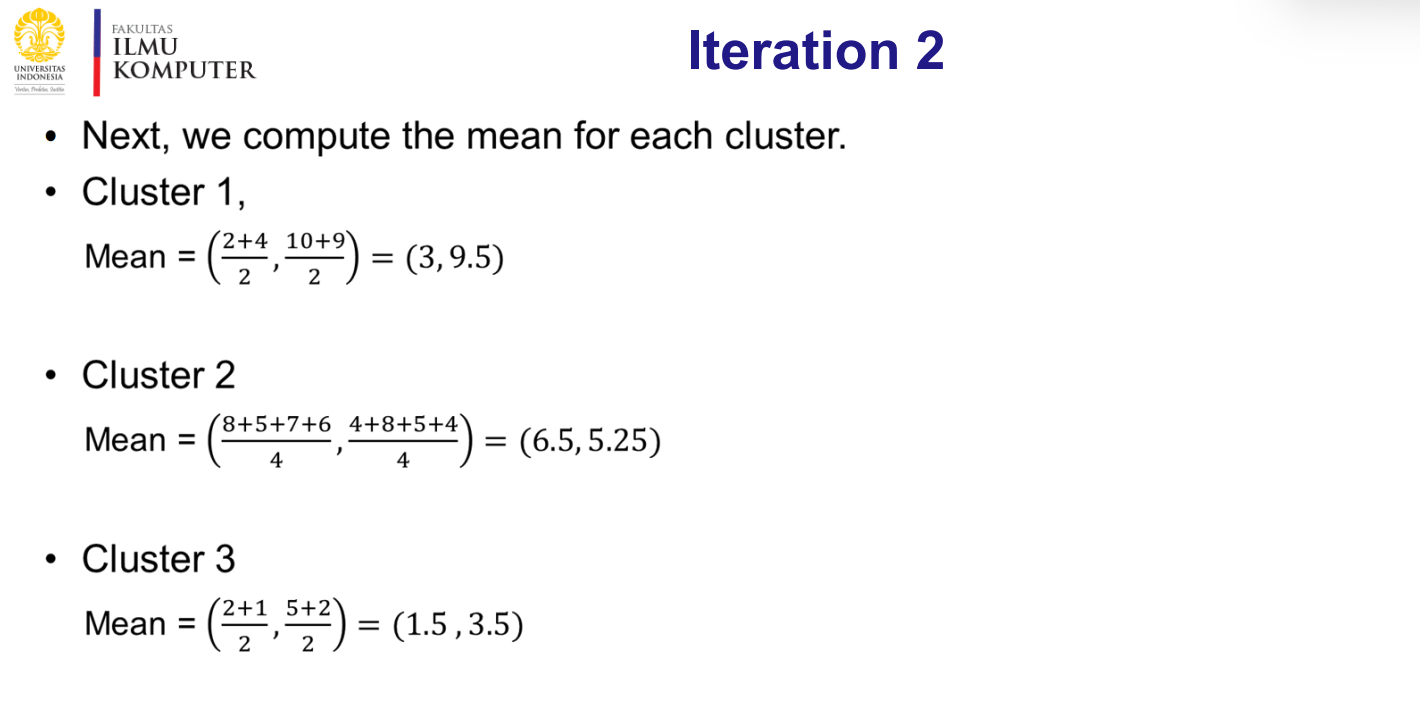
3. Iterasi 3
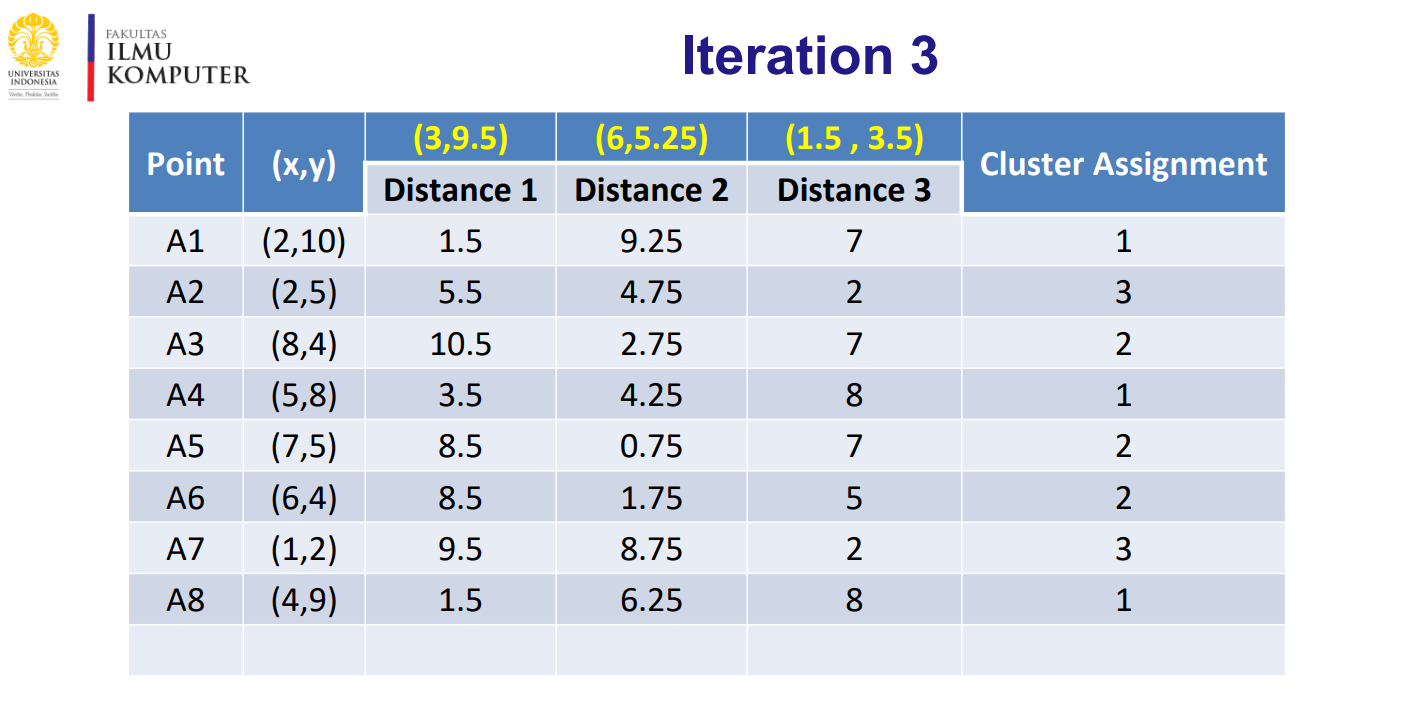
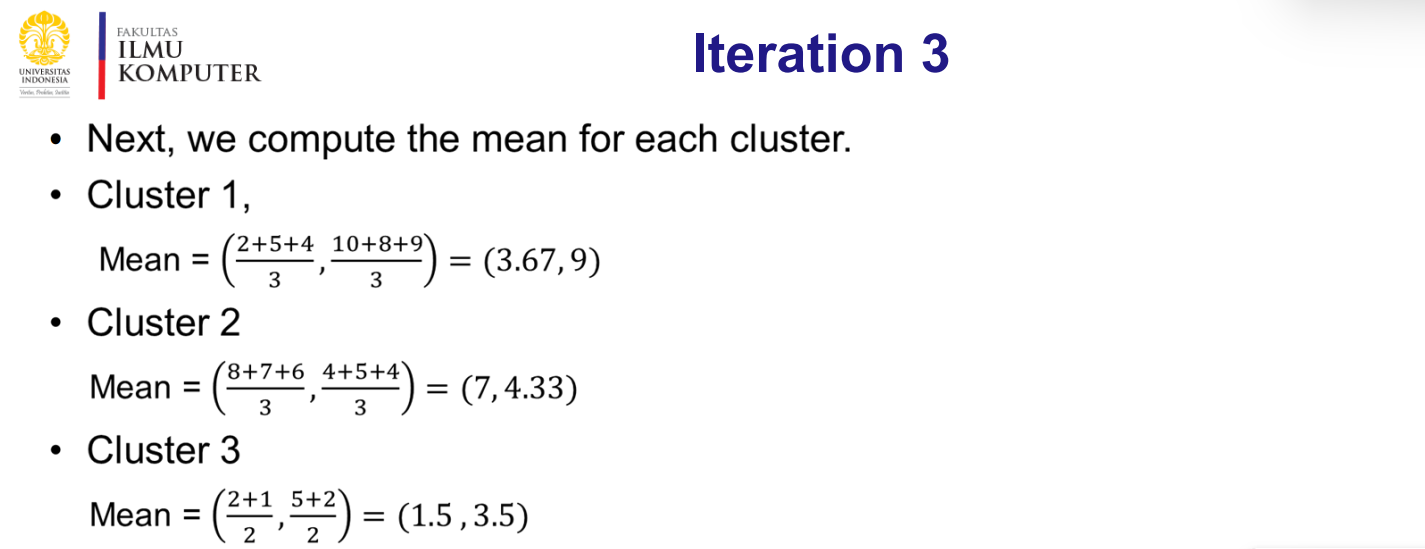
4. Iterasi 4 (iterasi terakhir, tidak ada pemetaan data pada cluster berebda dari cluster sebelumnya)
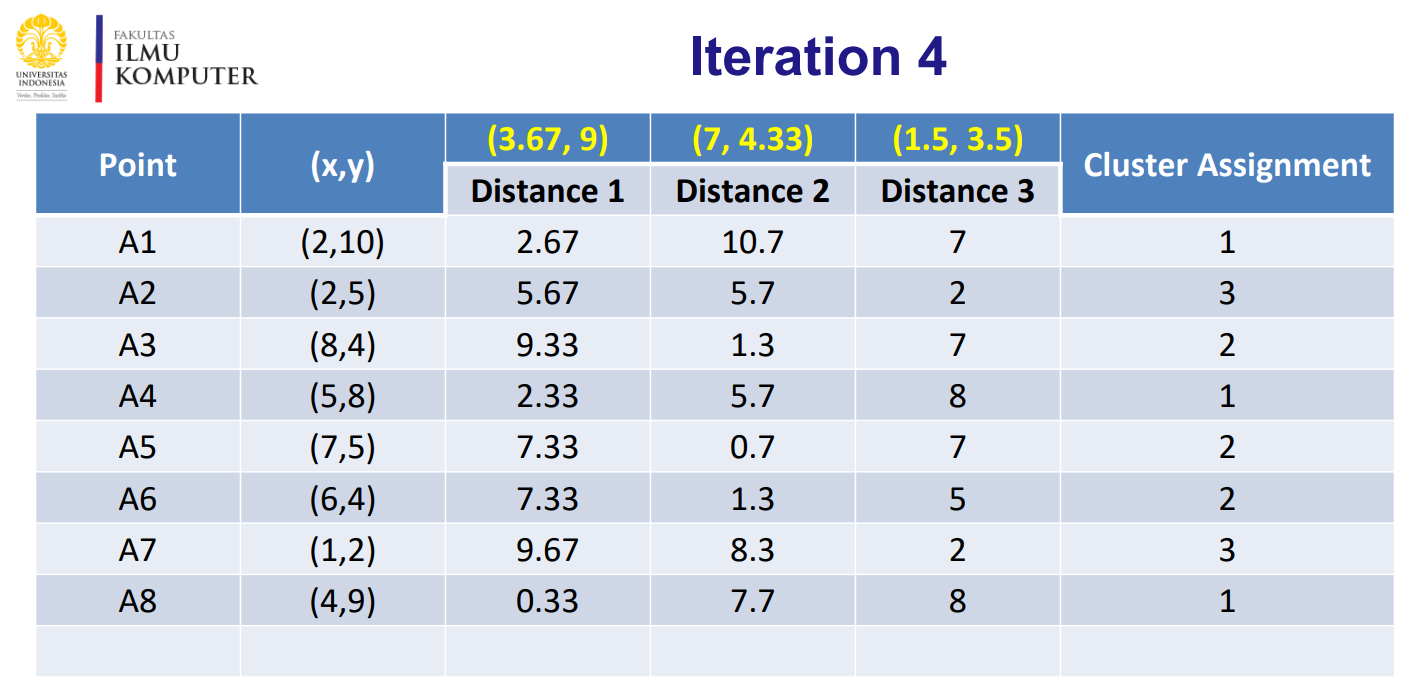
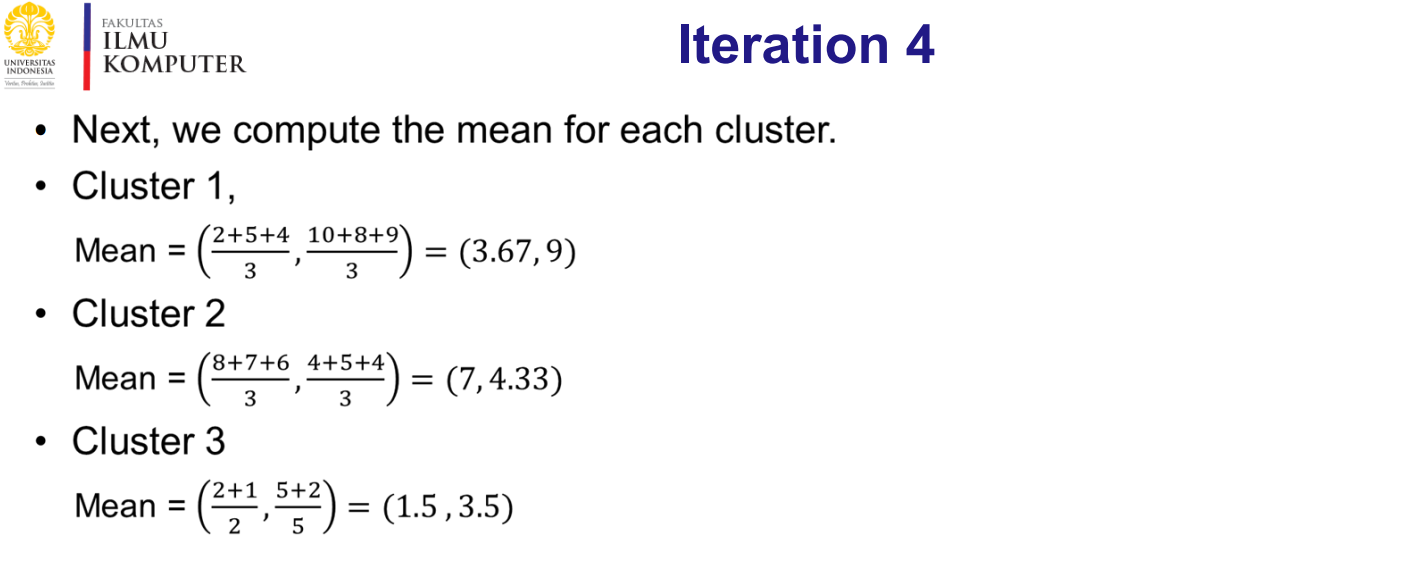

Referensi: slide pada scele (https://scele.cs.ui.ac.id/pluginfile.php/194084/mod_resource/content/0/08-kasdd-2022-clustering.pdf)